In [1]:

import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white', context='notebook', palette='deep')

import warnings

warnings.filterwarnings('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
#Checking for GPU
!nvidia-smi

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
trdf = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")
print("Data Loaded Successfully")

print(trdf.head())
print(trdf.info())

print(trdf.isnull().sum())

trdf, tsdf = train_test_split(trdf, test_size=0.2, random_state=42)  # 80% Train, 20% Test

print(f"Training Data Shape: {trdf.shape}")
print(f"Testing Data Shape: {tsdf.shape}")

Data Loaded Successfully
      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good          Low   
1          3.74               7.61                 Poor         High   
2          1.26               3.16                 Fair         High   
3          2.59              13.08            Excellent       Medium   
4          0.29              12.63                 Good          Low   

   Sleep_Hours  Physical_Activity_Hours Support_Systems_Acces

In [4]:

per_null_series = (trdf.isnull().sum() / len(trdf)) * 100
print(type(per_null_series))
print(per_null_series)
sorted_per_null_series = per_null_series.sort_values(ascending=False)
print(sorted_per_null_series)
temp = pd.DataFrame({"Missing Ratio in Train": sorted_per_null_series})
print(temp.head())

per_null_series_test = (tsdf.isnull().sum() / len(tsdf)) * 100
sorted_per_null_series_test = per_null_series_test.sort_values(ascending=False)
temp_ts = pd.DataFrame({"Percentage Missing Value in Test": sorted_per_null_series_test})
print(temp_ts)

#In output, observe that missing percentages are almost same in train and test, so that is good

<class 'pandas.core.series.Series'>
User_ID                     0.0
Age                         0.0
Gender                      0.0
Technology_Usage_Hours      0.0
Social_Media_Usage_Hours    0.0
Gaming_Hours                0.0
Screen_Time_Hours           0.0
Mental_Health_Status        0.0
Stress_Level                0.0
Sleep_Hours                 0.0
Physical_Activity_Hours     0.0
Support_Systems_Access      0.0
Work_Environment_Impact     0.0
Online_Support_Usage        0.0
dtype: float64
User_ID                     0.0
Age                         0.0
Gender                      0.0
Technology_Usage_Hours      0.0
Social_Media_Usage_Hours    0.0
Gaming_Hours                0.0
Screen_Time_Hours           0.0
Mental_Health_Status        0.0
Stress_Level                0.0
Sleep_Hours                 0.0
Physical_Activity_Hours     0.0
Support_Systems_Access      0.0
Work_Environment_Impact     0.0
Online_Support_Usage        0.0
dtype: float64
                          Missing Rati

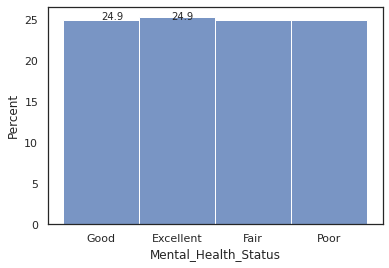

In [5]:
sns.histplot(x="Mental_Health_Status", stat="percent", data=trdf)  #This works

per_class0 = round(((trdf.loc[:, "Mental_Health_Status"] == "Poor").sum() / len(trdf)) * 100, 2)
per_class1 = round(((trdf.loc[:, "Mental_Health_Status"] == "Fair").sum() / len(trdf)) * 100, 2)
per_class2 = round(((trdf.loc[:, "Mental_Health_Status"] == "Good").sum() / len(trdf)) * 100, 2)
per_class3 = round(((trdf.loc[:, "Mental_Health_Status"] == "Excellent").sum() / len(trdf)) * 100, 2)

for i, fr in [(0, per_class0), (0.92, per_class1)]:
    plt.text(i, fr + 0.1, str(fr))

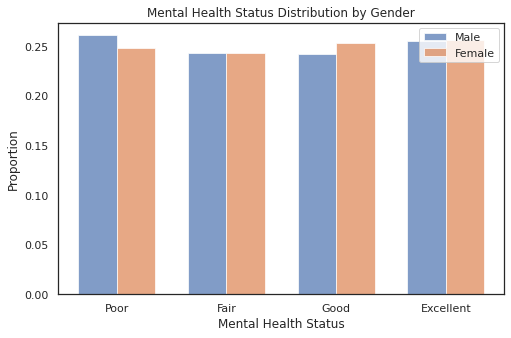

In [6]:
#Check between Male and Female

# Calculate proportions for males
per_males_poor = ((trdf["Gender"] == "Male") & (trdf["Mental_Health_Status"] == "Poor")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_fair = ((trdf["Gender"] == "Male") & (trdf["Mental_Health_Status"] == "Fair")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_good = ((trdf["Gender"] == "Male") & (trdf["Mental_Health_Status"] == "Good")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_excellent = ((trdf["Gender"] == "Male") & (trdf["Mental_Health_Status"] == "Excellent")).sum() / (
            trdf["Gender"] == "Male").sum()

# Calculate proportions for females
per_females_poor = ((trdf["Gender"] == "Female") & (trdf["Mental_Health_Status"] == "Poor")).sum() / (
            trdf["Gender"] == "Female").sum()
per_females_fair = ((trdf["Gender"] == "Female") & (trdf["Mental_Health_Status"] == "Fair")).sum() / (
            trdf["Gender"] == "Female").sum()
per_females_good = ((trdf["Gender"] == "Female") & (trdf["Mental_Health_Status"] == "Good")).sum() / (
            trdf["Gender"] == "Female").sum()
per_females_excellent = ((trdf["Gender"] == "Female") & (trdf["Mental_Health_Status"] == "Excellent")).sum() / (
            trdf["Gender"] == "Female").sum()

# Prepare data for plotting
categories = ["Poor", "Fair", "Good", "Excellent"]
male_percentages = [per_males_poor, per_males_fair, per_males_good, per_males_excellent]
female_percentages = [per_females_poor, per_females_fair, per_females_good, per_females_excellent]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(categories))

ax.bar(x, male_percentages, width=bar_width, label="Male", alpha=0.7)
ax.bar([i + bar_width for i in x], female_percentages, width=bar_width, label="Female", alpha=0.7)

# Labels and formatting
ax.set_xlabel("Mental Health Status")
ax.set_ylabel("Proportion")
ax.set_title("Mental Health Status Distribution by Gender")
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.show()


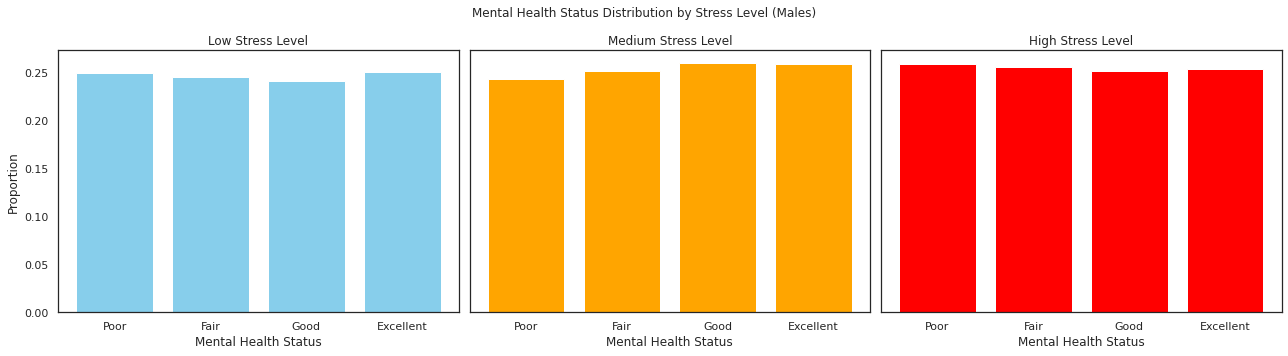

In [7]:
import matplotlib.pyplot as plt

# Calculate proportions for males (Stress Level: Low, Medium, High)
per_males_low_poor = ((trdf["Mental_Health_Status"] == "Poor") & (trdf["Stress_Level"] == "Low")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_low_fair = ((trdf["Mental_Health_Status"] == "Fair") & (trdf["Stress_Level"] == "Low")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_low_good = ((trdf["Mental_Health_Status"] == "Good") & (trdf["Stress_Level"] == "Low")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_low_excellent = ((trdf["Mental_Health_Status"] == "Excellent") & (trdf["Stress_Level"] == "Low")).sum() / (
            trdf["Gender"] == "Male").sum()

per_males_medium_poor = ((trdf["Mental_Health_Status"] == "Poor") & (trdf["Stress_Level"] == "Medium")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_medium_fair = ((trdf["Mental_Health_Status"] == "Fair") & (trdf["Stress_Level"] == "Medium")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_medium_good = ((trdf["Mental_Health_Status"] == "Good") & (trdf["Stress_Level"] == "Medium")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_medium_excellent = ((trdf["Mental_Health_Status"] == "Excellent") & (
            trdf["Stress_Level"] == "Medium")).sum() / (trdf["Gender"] == "Male").sum()

per_males_high_poor = ((trdf["Mental_Health_Status"] == "Poor") & (trdf["Stress_Level"] == "High")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_high_fair = ((trdf["Mental_Health_Status"] == "Fair") & (trdf["Stress_Level"] == "High")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_high_good = ((trdf["Mental_Health_Status"] == "Good") & (trdf["Stress_Level"] == "High")).sum() / (
            trdf["Gender"] == "Male").sum()
per_males_high_excellent = ((trdf["Mental_Health_Status"] == "Excellent") & (trdf["Stress_Level"] == "High")).sum() / (
            trdf["Gender"] == "Male").sum()

# Combine data for plotting
low_percentages = [per_males_low_poor, per_males_low_fair, per_males_low_good, per_males_low_excellent]
medium_percentages = [per_males_medium_poor, per_males_medium_fair, per_males_medium_good, per_males_medium_excellent]
high_percentages = [per_males_high_poor, per_males_high_fair, per_males_high_good, per_males_high_excellent]

categories = ["Poor", "Fair", "Good", "Excellent"]

# Plot: Stress Level vs Mental Health Status
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Low Stress Level
axes[0].bar(categories, low_percentages, color="skyblue")
axes[0].set_title("Low Stress Level")
axes[0].set_ylabel("Proportion")
axes[0].set_xlabel("Mental Health Status")

# Medium Stress Level
axes[1].bar(categories, medium_percentages, color="orange")
axes[1].set_title("Medium Stress Level")
axes[1].set_xlabel("Mental Health Status")

# High Stress Level
axes[2].bar(categories, high_percentages, color="red")
axes[2].set_title("High Stress Level")
axes[2].set_xlabel("Mental Health Status")

plt.suptitle("Mental Health Status Distribution by Stress Level (Males)")
plt.tight_layout()
plt.show()


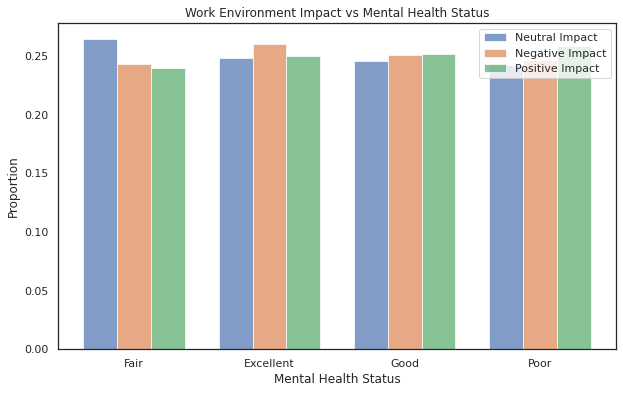

In [8]:

# Calculate proportions for Work_Environment_Impact based on Mental_Health_Status
neutral_impact = trdf[trdf["Work_Environment_Impact"] == "Neutral"]["Mental_Health_Status"].value_counts(normalize=True)
negative_impact = trdf[trdf["Work_Environment_Impact"] == "Negative"]["Mental_Health_Status"].value_counts(
    normalize=True)
positive_impact = trdf[trdf["Work_Environment_Impact"] == "Positive"]["Mental_Health_Status"].value_counts(
    normalize=True)

# Prepare data for plotting
categories = neutral_impact.index  # Mental health statuses
neutral_values = neutral_impact.values
negative_values = negative_impact.reindex(categories, fill_value=0).values
positive_values = positive_impact.reindex(categories, fill_value=0).values

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
x = range(len(categories))

ax.bar(x, neutral_values, width=bar_width, label="Neutral Impact", alpha=0.7)
ax.bar([i + bar_width for i in x], negative_values, width=bar_width, label="Negative Impact", alpha=0.7)
ax.bar([i + 2 * bar_width for i in x], positive_values, width=bar_width, label="Positive Impact", alpha=0.7)

# Labels and formatting
ax.set_xlabel("Mental Health Status")
ax.set_ylabel("Proportion")
ax.set_title("Work Environment Impact vs Mental Health Status")
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.show()


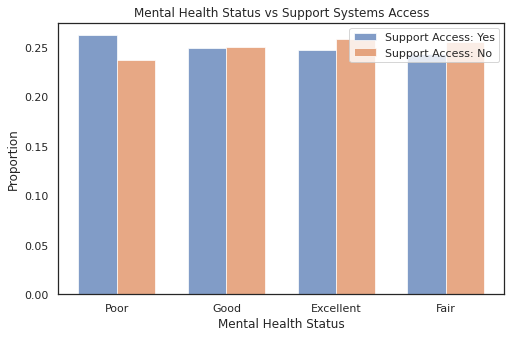

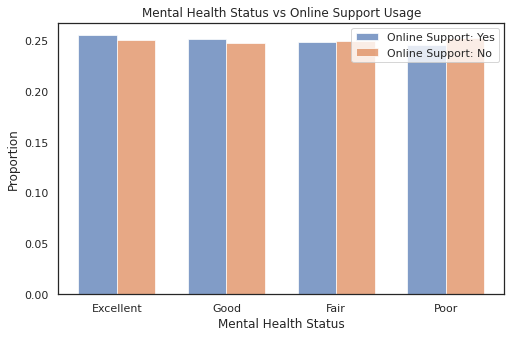

In [9]:
import matplotlib.pyplot as plt

# Calculate proportions for Support_Systems_Access
support_yes = trdf[trdf["Support_Systems_Access"] == "Yes"]["Mental_Health_Status"].value_counts(normalize=True)
support_no = trdf[trdf["Support_Systems_Access"] == "No"]["Mental_Health_Status"].value_counts(normalize=True)

# Plot for Support_Systems_Access
fig, ax = plt.subplots(figsize=(8, 5))
support_categories = support_yes.index
bar_width = 0.35
x = range(len(support_categories))

ax.bar(x, support_yes.values, width=bar_width, label="Support Access: Yes", alpha=0.7)
ax.bar([i + bar_width for i in x], support_no.reindex(support_categories, fill_value=0).values, width=bar_width,
       label="Support Access: No", alpha=0.7)

ax.set_xlabel("Mental Health Status")
ax.set_ylabel("Proportion")
ax.set_title("Mental Health Status vs Support Systems Access")
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(support_categories)
ax.legend()

plt.show()

# Calculate proportions for Online_Support_Usage
online_yes = trdf[trdf["Online_Support_Usage"] == "Yes"]["Mental_Health_Status"].value_counts(normalize=True)
online_no = trdf[trdf["Online_Support_Usage"] == "No"]["Mental_Health_Status"].value_counts(normalize=True)

# Plot for Online_Support_Usage
fig, ax = plt.subplots(figsize=(8, 5))
online_categories = online_yes.index
bar_width = 0.35
x = range(len(online_categories))

ax.bar(x, online_yes.values, width=bar_width, label="Online Support: Yes", alpha=0.7)
ax.bar([i + bar_width for i in x], online_no.reindex(online_categories, fill_value=0).values, width=bar_width,
       label="Online Support: No", alpha=0.7)

ax.set_xlabel("Mental Health Status")
ax.set_ylabel("Proportion")
ax.set_title("Mental Health Status vs Online Support Usage")
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(online_categories)
ax.legend()

plt.show()


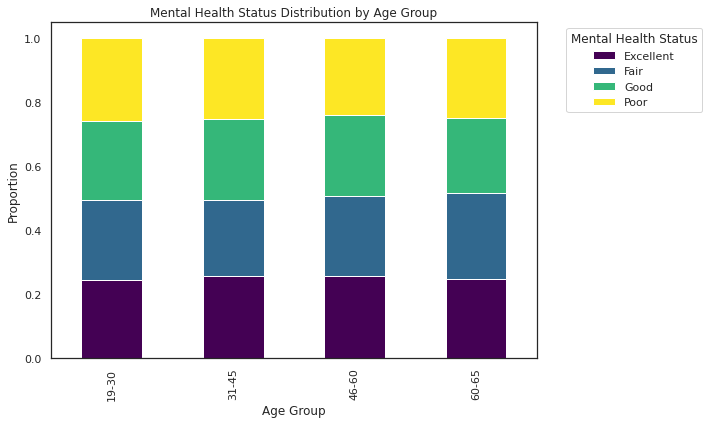


Age group distribution:
19-30    2006
31-45    2479
46-60    2521
60-65     818
Name: Age_Group, dtype: int64


In [10]:
def plot_mental_health_by_age(trdf):
    # Define age bins and labels based on actual data range (18-65)
    age_bins = [18, 30, 45, 60, 65]  # Adjusted to start at 18
    age_labels = ["19-30", "31-45", "46-60", "60-65"]

    # Ensure Age column is numeric and remove rows with missing data
    trdf["Age"] = pd.to_numeric(trdf["Age"], errors="coerce")
    trdf = trdf.dropna(subset=["Age", "Mental_Health_Status"])

    # Create Age_Group column
    trdf["Age_Group"] = pd.cut(trdf["Age"],
                               bins=age_bins,
                               labels=age_labels,
                               right=False)

    # Calculate proportions for Mental_Health_Status by Age Group
    age_group_distribution = (
        trdf.groupby("Age_Group")["Mental_Health_Status"]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
    )

    # Plot for Age Groups
    fig, ax = plt.subplots(figsize=(10, 6))
    age_group_distribution.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")

    # Formatting the plot
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Proportion")
    ax.set_title("Mental Health Status Distribution by Age Group")
    ax.legend(title="Mental Health Status", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # Print the distribution for verification
    print("\nAge group distribution:")
    print(trdf["Age_Group"].value_counts().sort_index())


# Call the function with your DataFrame
plot_mental_health_by_age(trdf)

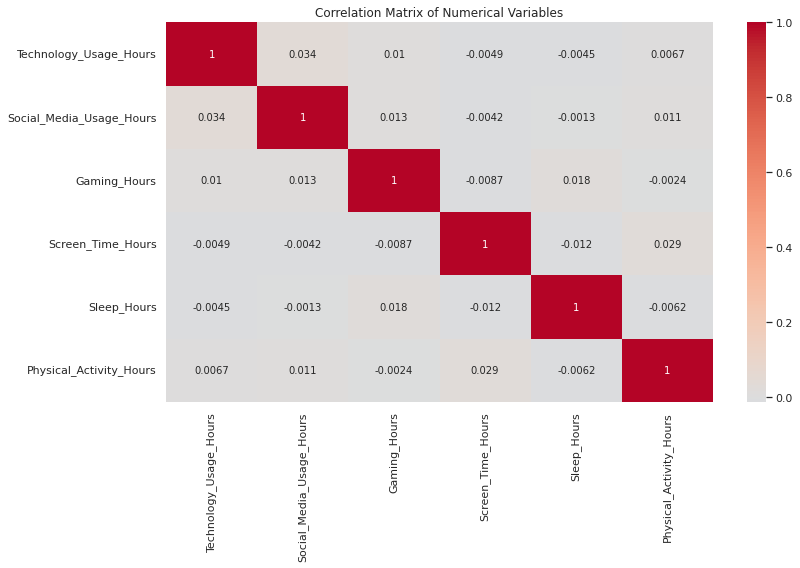


Chi-square test results for categorical variables:
Gender: p-value = 0.4259
Stress_Level: p-value = 0.8727
Support_Systems_Access: p-value = 0.0654
Work_Environment_Impact: p-value = 0.3424
Online_Support_Usage: p-value = 0.8719


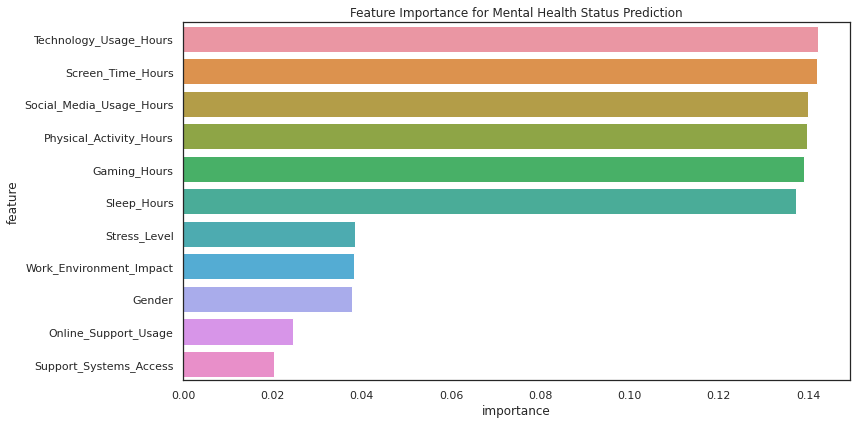

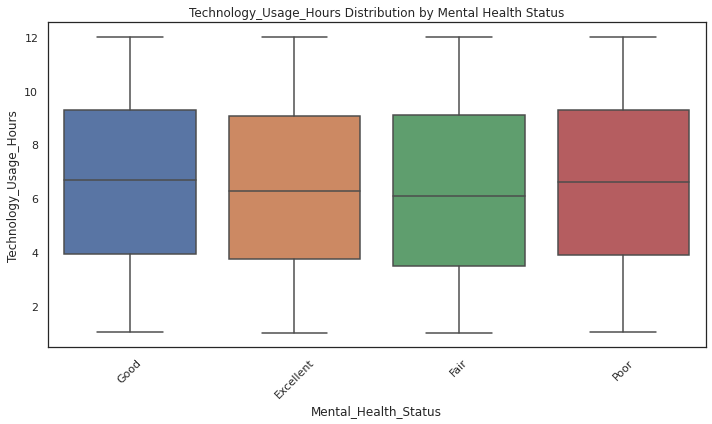


Summary statistics for Technology_Usage_Hours by Mental Health Status:
                       count      mean       std   min     25%    50%    75%  \
Mental_Health_Status                                                           
Excellent             2021.0  6.387105  3.136038  1.00  3.7400  6.280  9.060   
Fair                  1992.0  6.276481  3.224957  1.00  3.4675  6.090  9.120   
Good                  1995.0  6.579063  3.139938  1.01  3.9100  6.670  9.275   
Poor                  1992.0  6.604498  3.178140  1.01  3.8900  6.615  9.290   

                        max  
Mental_Health_Status         
Excellent             11.99  
Fair                  12.00  
Good                  12.00  
Poor                  12.00  
--------------------------------------------------------------------------------


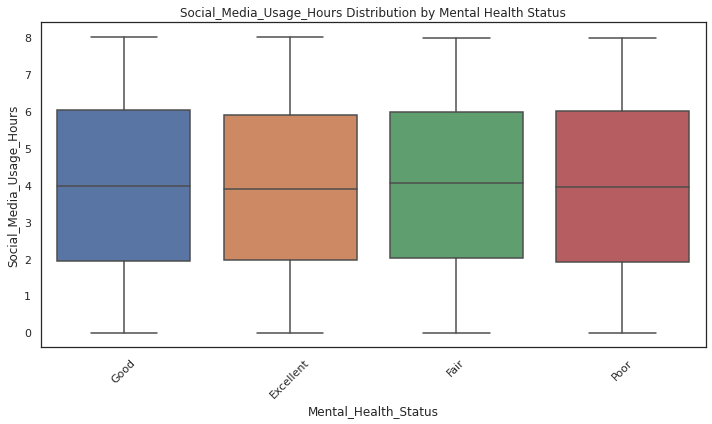


Summary statistics for Social_Media_Usage_Hours by Mental Health Status:
                       count      mean       std  min    25%   50%     75%  \
Mental_Health_Status                                                         
Excellent             2021.0  3.910965  2.288178  0.0  1.960  3.89  5.8800   
Fair                  1992.0  4.023097  2.303151  0.0  2.010  4.04  5.9825   
Good                  1995.0  3.989805  2.328565  0.0  1.945  3.97  6.0300   
Poor                  1992.0  3.962043  2.335287  0.0  1.920  3.95  6.0125   

                       max  
Mental_Health_Status        
Excellent             8.00  
Fair                  7.99  
Good                  8.00  
Poor                  7.99  
--------------------------------------------------------------------------------


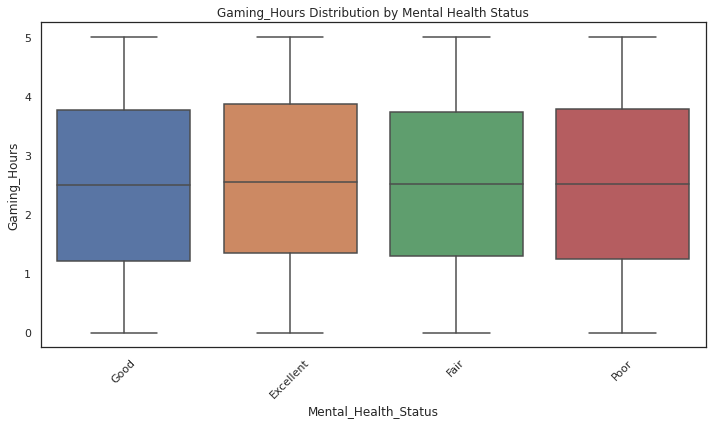


Summary statistics for Gaming_Hours by Mental Health Status:
                       count      mean       std  min     25%   50%   75%  max
Mental_Health_Status                                                          
Excellent             2021.0  2.562256  1.452306  0.0  1.3400  2.55  3.87  5.0
Fair                  1992.0  2.492595  1.427566  0.0  1.2975  2.51  3.74  5.0
Good                  1995.0  2.483724  1.448317  0.0  1.2100  2.50  3.77  5.0
Poor                  1992.0  2.527806  1.453311  0.0  1.2500  2.52  3.79  5.0
--------------------------------------------------------------------------------


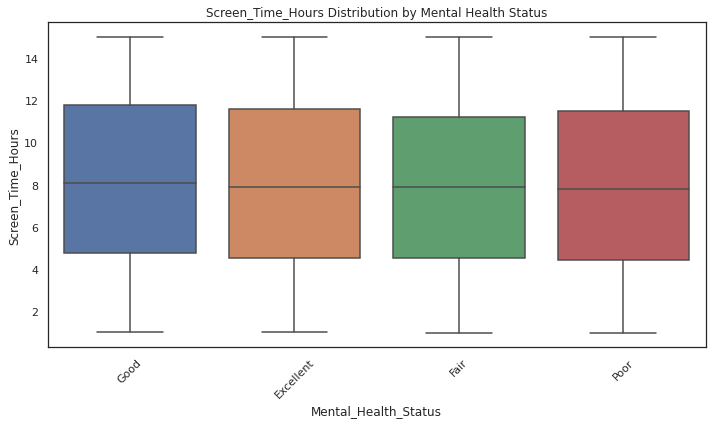


Summary statistics for Screen_Time_Hours by Mental Health Status:
                       count      mean       std   min     25%    50%  \
Mental_Health_Status                                                    
Excellent             2021.0  7.991019  4.047674  1.01  4.5300  7.910   
Fair                  1992.0  7.880748  3.967078  1.00  4.5175  7.910   
Good                  1995.0  8.184797  4.065108  1.02  4.7600  8.110   
Poor                  1992.0  7.909001  4.012056  1.00  4.4175  7.805   

                          75%    max  
Mental_Health_Status                  
Excellent             11.5900  15.00  
Fair                  11.2025  14.99  
Good                  11.7950  15.00  
Poor                  11.4900  15.00  
--------------------------------------------------------------------------------


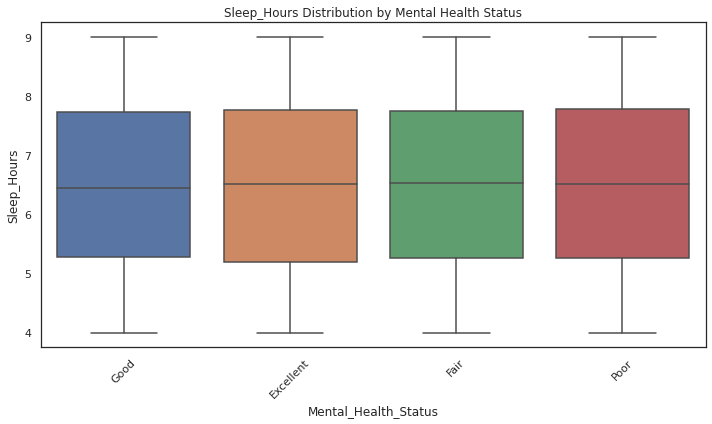


Summary statistics for Sleep_Hours by Mental Health Status:
                       count      mean       std  min     25%   50%   75%  max
Mental_Health_Status                                                          
Excellent             2021.0  6.477363  1.459920  4.0  5.1900  6.51  7.76  9.0
Fair                  1992.0  6.511652  1.441629  4.0  5.2600  6.54  7.75  9.0
Good                  1995.0  6.490632  1.441417  4.0  5.2800  6.44  7.74  9.0
Poor                  1992.0  6.505939  1.458715  4.0  5.2575  6.52  7.79  9.0
--------------------------------------------------------------------------------


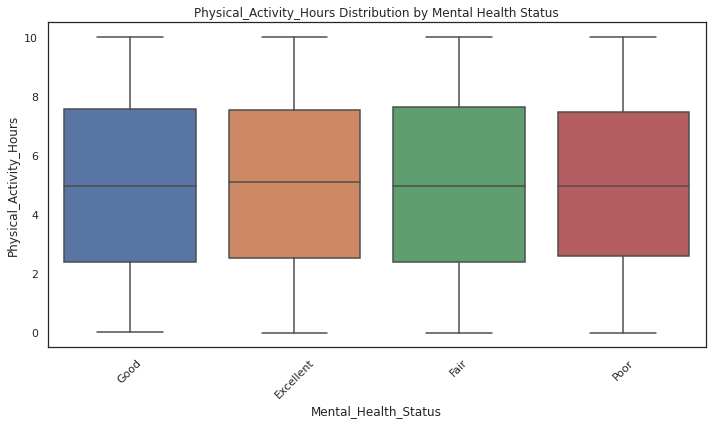


Summary statistics for Physical_Activity_Hours by Mental Health Status:
                       count      mean       std   min     25%   50%    75%  \
Mental_Health_Status                                                          
Excellent             2021.0  5.050826  2.886187  0.00  2.5400  5.10  7.520   
Fair                  1992.0  4.985547  2.937878  0.00  2.3875  4.96  7.620   
Good                  1995.0  4.954486  2.938163  0.01  2.3850  4.95  7.565   
Poor                  1992.0  5.021777  2.871625  0.00  2.5800  4.97  7.460   

                       max  
Mental_Health_Status        
Excellent             10.0  
Fair                  10.0  
Good                  10.0  
Poor                  10.0  
--------------------------------------------------------------------------------


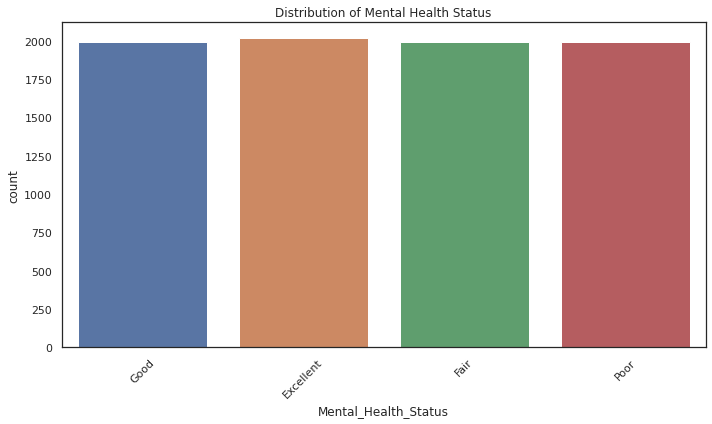

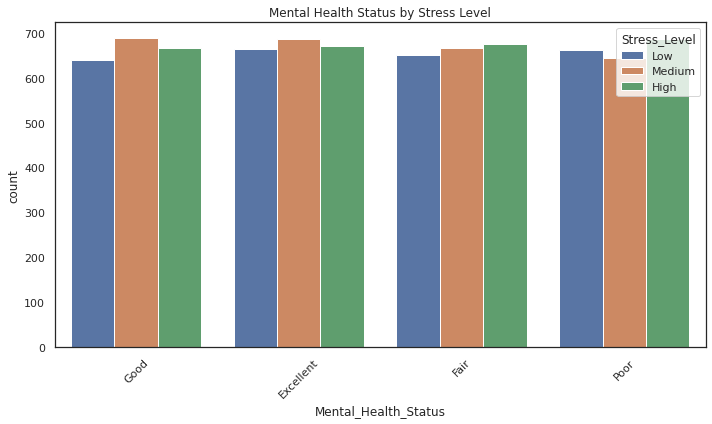

In [11]:
from scipy.stats import chi2_contingency


def analyze_mental_health_dependencies(df):
    # Create a copy of the dataframe
    df_encoded = df.copy()

    # Define column types explicitly
    numerical_cols = [
        'Technology_Usage_Hours',
        'Social_Media_Usage_Hours',
        'Gaming_Hours',
        'Screen_Time_Hours',
        'Sleep_Hours',
        'Physical_Activity_Hours'
    ]

    categorical_cols = [
        'Gender',
        'Stress_Level',
        'Support_Systems_Access',
        'Work_Environment_Impact',
        'Online_Support_Usage',
        'Mental_Health_Status'
    ]

    # Ensure numerical columns are float
    for col in numerical_cols:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

    # Ensure categorical columns are string
    for col in categorical_cols:
        df_encoded[col] = df_encoded[col].astype(str)

    # Label encode categorical variables
    le = LabelEncoder()
    df_model = df_encoded.copy()
    for col in categorical_cols:
        df_model[col] = le.fit_transform(df_encoded[col])

    # 1. Correlation Analysis for Numerical Variables
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_encoded[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

    # 2. Statistical Analysis for Categorical Variables
    print("\nChi-square test results for categorical variables:")
    for col in categorical_cols:
        if col != 'Mental_Health_Status':
            contingency = pd.crosstab(df_encoded[col], df_encoded['Mental_Health_Status'])
            chi2, p_value, _, _ = chi2_contingency(contingency)
            print(f"{col}: p-value = {p_value:.4f}")

    # 3. Feature Importance using Random Forest
    X = df_model[numerical_cols + [col for col in categorical_cols if col != 'Mental_Health_Status']]
    y = df_model['Mental_Health_Status']

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance for Mental Health Status Prediction')
    plt.tight_layout()
    plt.show()

    # 4. Distribution Analysis
    # For numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Mental_Health_Status', y=col, data=df_encoded)
        plt.title(f'{col} Distribution by Mental Health Status')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print(f"\nSummary statistics for {col} by Mental Health Status:")
        print(df_encoded.groupby('Mental_Health_Status')[col].describe())
        print("-" * 80)

    # 5. Additional insights
    # Count of Mental Health Status
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_encoded, x='Mental_Health_Status')
    plt.title('Distribution of Mental Health Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Stress Level vs Mental Health Status
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_encoded, x='Mental_Health_Status', hue='Stress_Level')
    plt.title('Mental Health Status by Stress Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Run the analysis
analyze_mental_health_dependencies(trdf)

In [12]:
#Main

import pandas as pd

df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")

df = df.drop(columns=['User_ID'], axis=1)

import pandas as pd

# Example Encoding
df = pd.get_dummies(df, columns=['Gender', 'Work_Environment_Impact'], drop_first=False)
df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Support_Systems_Access'] = df['Support_Systems_Access'].map({'Yes': 1, 'No': 0})
df['Online_Support_Usage'] = df['Online_Support_Usage'].map({'Yes': 1, 'No': 0})

# Combine Work_Environment_Impact back into a single column
df['Work_Environment_Impact'] = (
        df['Work_Environment_Impact_Negative'] * 1 +
        df['Work_Environment_Impact_Neutral'] * 2 +
        df['Work_Environment_Impact_Positive'] * 3
)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
continuous_columns = [
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours'
]
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df['Mental_Health_Status'] = df['Mental_Health_Status'].map({
    'Excellent': 0, 'Good': 1, 'Fair': 2, 'Poor': 3
})

df['Interaction_Stress_WorkImpact'] = df['Stress_Level'] * df['Work_Environment_Impact']
df['Screen_to_Sleep_Ratio'] = df['Screen_Time_Hours'] / df['Sleep_Hours']
df['Tech_Gaming_Interaction'] = df['Technology_Usage_Hours'] * df['Gaming_Hours']

df['Activity_to_Sleep_Ratio'] = df['Physical_Activity_Hours'] / (df['Sleep_Hours'] + 1e-5)

df['Gaming_to_Screen_Ratio'] = df['Gaming_Hours'] / (df['Screen_Time_Hours'] + 1e-5)

df['Total_Usage_Hours'] = (
        df['Technology_Usage_Hours'] +
        df['Social_Media_Usage_Hours'] +
        df['Gaming_Hours']
)

df['Total_Healthy_Hours'] = df['Sleep_Hours'] + df['Physical_Activity_Hours']

df['Interaction_Stress_WorkImpact'] = df['Stress_Level'] * df['Work_Environment_Impact']

df['Tech_Social_Interaction'] = df['Technology_Usage_Hours'] * df['Social_Media_Usage_Hours']

df['Gaming_Sleep_Interaction'] = df['Gaming_Hours'] * df['Sleep_Hours']

df['Screen_Time_Squared'] = df['Screen_Time_Hours'] ** 2

df['Sleep_Stress_Interaction'] = df['Sleep_Hours'] * df['Stress_Level'] ** 2

df['Tech_Usage_Proportion'] = df['Technology_Usage_Hours'] / (df['Total_Usage_Hours'] + 1e-5)

df['Gaming_Proportion'] = df['Gaming_Hours'] / (df['Total_Usage_Hours'] + 1e-5)

df['Excessive_Screen_Flag'] = (df['Screen_Time_Hours'] > 10).astype(int)

df['Low_Sleep_Flag'] = (df['Sleep_Hours'] < 6).astype(int)

df['Stress_OnlineSupport'] = df['Stress_Level'] * df['Online_Support_Usage']

df['Work_Support_Interaction'] = df['Work_Environment_Impact'] * df['Support_Systems_Access']

df['Positive_Work_Flag'] = (df['Work_Environment_Impact'] == 3).astype(int)

df['High_Stress_Flag'] = (df['Stress_Level'] > 1).astype(int)

df['Age_Category'] = pd.cut(
    df['Age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior']
)

df['Age_Screen_Interaction'] = df['Age'] * df['Screen_Time_Hours']

df['Social_Stress_Ratio'] = df['Social_Media_Usage_Hours'] / (df['Stress_Level'] + 1e-5)

df['Social_Support_Interaction'] = df['Social_Media_Usage_Hours'] * df['Support_Systems_Access']




In [13]:

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from sklearn.feature_selection import SelectKBest, f_classif, RFE

from xgboost import XGBClassifier
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


# Data Cleaning Function
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()

    # Replace infinities with NaN
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

    # For ratio columns, replace NaN with 0
    ratio_columns = [
        'Screen_to_Sleep_Ratio', 'Activity_to_Sleep_Ratio',
        'Gaming_to_Screen_Ratio', 'Tech_Usage_Proportion',
        'Gaming_Proportion', 'Social_Stress_Ratio'
    ]
    df_clean[ratio_columns] = df_clean[ratio_columns].fillna(0)

    # For interaction columns, replace NaN with the mean
    interaction_columns = [
        'Interaction_Stress_WorkImpact', 'Tech_Gaming_Interaction',
        'Tech_Social_Interaction', 'Gaming_Sleep_Interaction',
        'Sleep_Stress_Interaction', 'Social_Support_Interaction',
        'Age_Screen_Interaction'
    ]
    for col in interaction_columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

    # For remaining columns, replace NaN with median
    remaining_cols = [col for col in df_clean.columns
                      if col not in ratio_columns + interaction_columns]
    for col in remaining_cols:
        if df_clean[col].dtype in ['float64', 'int64']:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    return df_clean


# Drop non-numeric columns and handle any remaining categorical columns
df = df.drop(['Age_Category'], axis=1)  # Drop categorical column

# Clean the data
df_cleaned = clean_data(df)

# Prepare features and target
X = df_cleaned.drop('Mental_Health_Status', axis=1)
y = df_cleaned['Mental_Health_Status']

# Print data info
print("\nFeature shape:", X.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Feature Selection Methods
def select_features(X_train, y_train, X_test):
    results = {}

    # 1. SelectKBest
    k_best = SelectKBest(score_func=f_classif, k=min(20, X_train.shape[1]))
    X_train_kb = k_best.fit_transform(X_train, y_train)
    X_test_kb = k_best.transform(X_test)
    selected_features_kb = X_train.columns[k_best.get_support()].tolist()
    results['SelectKBest'] = (X_train_kb, X_test_kb, selected_features_kb)

    # 2. Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(estimator=rf, n_features_to_select=min(20, X_train.shape[1]))
    X_train_rf = rfe.fit_transform(X_train, y_train)
    X_test_rf = rfe.transform(X_test)
    selected_features_rf = X_train.columns[rfe.support_].tolist()
    results['RandomForest'] = (X_train_rf, X_test_rf, selected_features_rf)

    return results


# Neural Network Model
class MentalHealthNN(nn.Module):
    def __init__(self, input_size):
        super(MentalHealthNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 4)  # 4 classes for Mental Health Status
        )

    def forward(self, x):
        return self.layers(x)


# Training function for Neural Network
def train_nn(X_train, y_train, X_test, y_test):
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.LongTensor(y_train.values).to(device)
    X_test_tensor = torch.FloatTensor(X_test).to(device)

    model = MentalHealthNN(X_train.shape[1]).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training
    model.train()
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predictions = test_outputs.cpu().numpy().argmax(axis=1)

    return predictions


# Function to evaluate multiple models
def evaluate_models(X_train, X_test, y_train, y_test, feature_method):
    results = {}

    # Traditional ML Models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
        'XGBoost': XGBClassifier(tree_method='gpu_hist') if device.type == 'cuda' else XGBClassifier(),
        'LightGBM': lgb.LGBMClassifier(device='gpu') if device.type == 'cuda' else lgb.LGBMClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred)
        }

    # Neural Network
    print("\nTraining Neural Network...")
    nn_predictions = train_nn(X_train, y_train, X_test, y_test)
    results['Neural Network'] = {
        'accuracy': accuracy_score(y_test, nn_predictions),
        'report': classification_report(y_test, nn_predictions)
    }

    return results


# Main execution
print("Performing feature selection...")
feature_selection_results = select_features(X_train, y_train, X_test)

# Evaluate models with different feature selection methods
all_results = {}
for method, (X_train_selected, X_test_selected, selected_features) in feature_selection_results.items():
    print(f"\nResults with {method} feature selection:")
    print("Selected features:", selected_features)

    results = evaluate_models(X_train_selected, X_test_selected, y_train, y_test, method)
    all_results[method] = results

    # Print results
    print("\nModel Performance:")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['report'])

# Find best model and feature selection method
best_accuracy = 0
best_model = None
best_features = None

for method in all_results:
    for model in all_results[method]:
        accuracy = all_results[method][model]['accuracy']
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_features = method

print(f"\nBest Performance:")
print(f"Model: {best_model}")
print(f"Feature Selection: {best_features}")
print(f"Accuracy: {best_accuracy:.4f}")

Using device: cuda

Feature shape: (10000, 39)

Target distribution:
0    0.2518
1    0.2508
2    0.2490
3    0.2484
Name: Mental_Health_Status, dtype: float64
Performing feature selection...

Results with SelectKBest feature selection:
Selected features: ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Screen_Time_Hours', 'Physical_Activity_Hours', 'Support_Systems_Access', 'Gender_Female', 'Gender_Other', 'Screen_to_Sleep_Ratio', 'Tech_Gaming_Interaction', 'Activity_to_Sleep_Ratio', 'Gaming_to_Screen_Ratio', 'Total_Usage_Hours', 'Screen_Time_Squared', 'Sleep_Stress_Interaction', 'Tech_Usage_Proportion', 'Stress_OnlineSupport', 'Work_Support_Interaction', 'Age_Screen_Interaction', 'Social_Support_Interaction']

Training Random Forest...

Training XGBoost...
[16:22:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.



Training Gradient Boosting...

Training Neural Network...

Model Performance:

Random Forest:
Accuracy: 0.2605
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.27      0.26       504
           1       0.25      0.26      0.25       501
           2       0.25      0.25      0.25       498
           3       0.28      0.27      0.27       497

    accuracy                           0.26      2000
   macro avg       0.26      0.26      0.26      2000
weighted avg       0.26      0.26      0.26      2000


XGBoost:
Accuracy: 0.2535
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23       504
           1       0.27      0.28      0.28       501
           2       0.24      0.24      0.24       498
           3       0.27      0.27      0.27       497

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2000


Available columns:
['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours', 'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours', 'Support_Systems_Access', 'Online_Support_Usage', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Work_Environment_Impact_Negative', 'Work_Environment_Impact_Neutral', 'Work_Environment_Impact_Positive', 'Work_Environment_Impact', 'Interaction_Stress_WorkImpact', 'Screen_to_Sleep_Ratio', 'Tech_Gaming_Interaction', 'Activity_to_Sleep_Ratio', 'Gaming_to_Screen_Ratio', 'Total_Usage_Hours', 'Total_Healthy_Hours', 'Tech_Social_Interaction', 'Gaming_Sleep_Interaction', 'Screen_Time_Squared', 'Sleep_Stress_Interaction', 'Tech_Usage_Proportion', 'Gaming_Proportion', 'Excessive_Screen_Flag', 'Low_Sleep_Flag', 'Stress_OnlineSupport', 'Work_Support_Interaction', 'Positive_Work_Flag', 'High_Stress_Flag', 'Age_Screen_Interaction', 'Social_Stress_Ratio', 'Social_Support_Interaction']


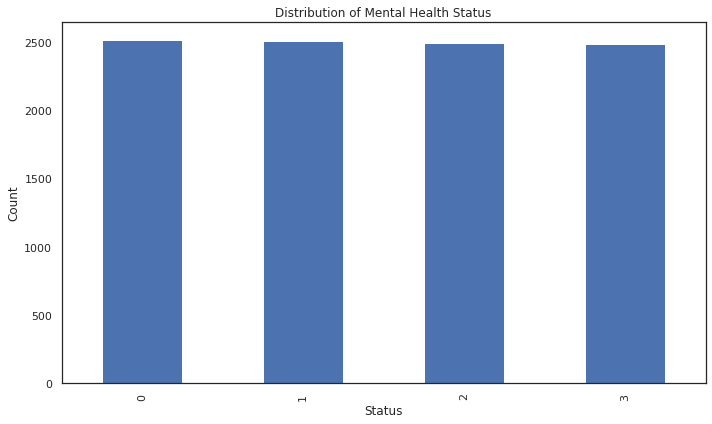


Correlations with Mental Health Status:
Mental_Health_Status                1.000000
Social_Support_Interaction          0.016784
Support_Systems_Access              0.016270
Work_Support_Interaction            0.013753
Social_Stress_Ratio                 0.011948
Sleep_Hours                         0.009360
High_Stress_Flag                    0.009294
Interaction_Stress_WorkImpact       0.009022
Gender_Male                         0.008735
Sleep_Stress_Interaction            0.008732
Work_Environment_Impact_Neutral     0.008716
Technology_Usage_Hours              0.007351
Work_Environment_Impact             0.007173
Screen_to_Sleep_Ratio               0.007061
Gaming_to_Screen_Ratio              0.006750
Tech_Social_Interaction             0.006357
Social_Media_Usage_Hours            0.004836
Total_Healthy_Hours                 0.004011
Total_Tech_Hours                    0.003797
Total_Usage_Hours                   0.003797
Gender_Other                        0.003063
Tech_Usage_Pro

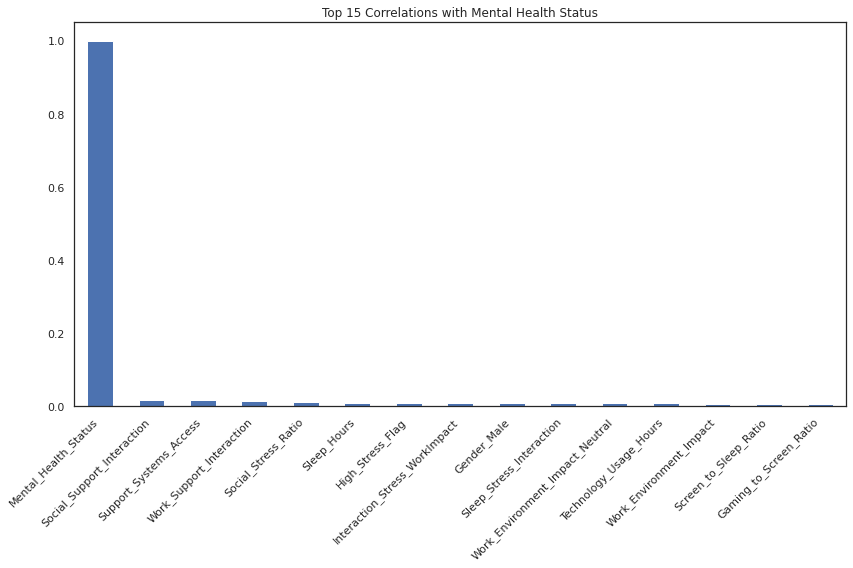

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's see what columns we have
print("Available columns:")
print(df.columns.tolist())

# Let's check the distribution of Mental Health Status
plt.figure(figsize=(10, 6))
df['Mental_Health_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Mental Health Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


def create_enhanced_features(df):
    df_enhanced = df.copy()

    # Technology Usage Pattern
    df_enhanced['Total_Tech_Hours'] = (
            df_enhanced['Technology_Usage_Hours'] +
            df_enhanced['Social_Media_Usage_Hours'] +
            df_enhanced['Gaming_Hours']
    )

    # Health Balance Score
    df_enhanced['Health_Balance'] = (
                                            df_enhanced['Sleep_Hours'] +
                                            df_enhanced['Physical_Activity_Hours']
                                    ) / (df_enhanced['Total_Tech_Hours'] + 1)

    # Screen Time Impact
    df_enhanced['Screen_Impact'] = (
            df_enhanced['Screen_Time_Hours'] /
            (df_enhanced['Sleep_Hours'] + 1)
    )

    # Physical Health Index
    df_enhanced['Physical_Health_Index'] = (
                                                   df_enhanced['Sleep_Hours'] *
                                                   df_enhanced['Physical_Activity_Hours']
                                           ) / (df_enhanced['Screen_Time_Hours'] + 1)

    # Age-Technology Interaction
    df_enhanced['Age_Tech_Interaction'] = (
            df_enhanced['Age'] *
            df_enhanced['Total_Tech_Hours']
    )

    # Gaming-Social Balance
    df_enhanced['Gaming_Social_Ratio'] = (
            df_enhanced['Gaming_Hours'] /
            (df_enhanced['Social_Media_Usage_Hours'] + 1)
    )

    return df_enhanced


# Create new features
df_enhanced = create_enhanced_features(df)

# Check correlations with Mental Health Status
correlations = df_enhanced.corr()['Mental_Health_Status'].sort_values(ascending=False)
print("\nCorrelations with Mental Health Status:")
print(correlations)

# Plot top 15 correlations
plt.figure(figsize=(12, 8))
correlations.head(15).plot(kind='bar')
plt.title('Top 15 Correlations with Mental Health Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Train a Random Forest model to check feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Prepare features (exclude non-numeric columns if any)
X = df_enhanced.select_dtypes(include=[np.number]).drop('Mental_Health_Status', axis=1)
y = df_enhanced['Mental_Health_Status']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get and plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
feature_importance.head(15).plot(kind='bar', x='feature', y='importance')
plt.title('Top 15 Feature Importance Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check model performance
scores = cross_val_score(rf, X, y, cv=5)
print("\nModel Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")


# Sample data preprocessing
def preprocess_data(df, is_train=True, label_encoders=None, scaler=None):
    df = df.copy()

    # Drop irrelevant columns
    if "User_ID" in df.columns:
        df.drop("User_ID", axis=1, inplace=True)
        df.drop("Mental_Health_Status", axis=1, inplace=True)

    # Handle missing values
    numerical_cols = [
        'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
        'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours'
    ]
    categorical_cols = [
        'Gender', 'Stress_Level', 'Support_Systems_Access',
        'Work_Environment_Impact', 'Online_Support_Usage'
    ]

    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Encode categorical variables
    if is_train:
        label_encoders = {}
        for col in categorical_cols:
            label_encoders[col] = LabelEncoder()
            df[col] = label_encoders[col].fit_transform(df[col])
    else:
        for col in categorical_cols:
            df[col] = label_encoders[col].transform(df[col])

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    else:
        df[numerical_cols] = scaler.transform(df[numerical_cols])

    return df, label_encoders, scaler


# Preprocessing the data
X, label_encoders, scaler = preprocess_data(df)
y = LabelEncoder().fit_transform(df['Mental_Health_Status'])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model definitions
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


# Hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


# Tuning parameters for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Tuning parameters for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Tuning parameters for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Train and evaluate models
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    if name == "Random Forest":
        best_model = tune_model(model, rf_params, X_train, y_train)
    elif name == "Gradient Boosting":
        best_model = tune_model(model, gb_params, X_train, y_train)
    elif name == "XGBoost":
        best_model = tune_model(model, xgb_params, X_train, y_train)

    # Save the best model
    best_models[name] = best_model

    # Evaluate the model
    print(f"\n{name} Evaluation:")
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample dominant features
dominant_features = [
    'Technology_Usage_Hours', 'Screen_Time_Hours',
    'Social_Media_Usage_Hours', 'Physical_Activity_Hours',
    'Gaming_Hours', 'Sleep_Hours'
]


# Preprocessing function
def preprocess_data(df, features, is_train=True, scaler=None, label_encoder=None):
    df = df[features + ['Mental_Health_Status']].copy()

    # Handle missing values
    for col in features:
        df[col].fillna(df[col].median(), inplace=True)

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
    else:
        df[features] = scaler.transform(df[features])

    # Encode labels
    if is_train:
        label_encoder = LabelEncoder()
        df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])
    else:
        df['Mental_Health_Status'] = label_encoder.transform(df['Mental_Health_Status'])

    X = df[features]
    y = df['Mental_Health_Status']
    return X, y, scaler, label_encoder


# Load dataset (replace with actual dataset path)
df = pd.read_csv('/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv')

# Preprocess data
X, y, scaler, label_encoder = preprocess_data(df, dominant_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model definitions
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


# Hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


# Tuning parameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Tuning parameters for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Tuning parameters for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Train and evaluate models
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    if name == "Random Forest":
        best_model = tune_model(model, rf_params, X_train, y_train)
    elif name == "Gradient Boosting":
        best_model = tune_model(model, gb_params, X_train, y_train)
    elif name == "XGBoost":
        best_model = tune_model(model, xgb_params, X_train, y_train)

    # Save the best model
    best_models[name] = best_model

    # Evaluate the model
    print(f"\n{name} Evaluation:")
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Ensemble model with VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['Random Forest']),
        ('gb', best_models['Gradient Boosting']),
        ('xgb', best_models['XGBoost'])
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Evaluate ensemble model
y_pred_ensemble = voting_clf.predict(X_test)
print("\nEnsemble Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Enable GPU for TensorFlow
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load your dataset
# Replace with your dataset path or use sample data
df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")

# Focus on dominant features
dominant_features = [
    'Technology_Usage_Hours', 'Screen_Time_Hours',
    'Social_Media_Usage_Hours', 'Physical_Activity_Hours',
    'Gaming_Hours', 'Sleep_Hours'
]


# Preprocess data
def preprocess_data(df, features, is_train=True, scaler=None, label_encoder=None):
    df = df[features + ['Mental_Health_Status']].copy()
    if "User_ID" in df.columns:
        df.drop("User_ID", axis=1, inplace=True)

    # Handle missing values
    for col in features:
        df[col].fillna(df[col].median(), inplace=True)

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
    else:
        df[features] = scaler.transform(df[features])

    # Encode labels
    if is_train:
        label_encoder = LabelEncoder()
        df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])
    else:
        df['Mental_Health_Status'] = label_encoder.transform(df['Mental_Health_Status'])

    X = df[features]
    y = df['Mental_Health_Status']
    return X, y, scaler, label_encoder


# Preprocess the dataset
X, y, scaler, label_encoder = preprocess_data(df, dominant_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical for DL
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


# Build a Deep Learning model for feature extraction
def build_feature_extractor(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),  # Penultimate layer for feature extraction
        Dropout(0.3),
        Dense(y_train_cat.shape[1], activation='softmax')  # Final layer for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Train the DL model
feature_extractor = build_feature_extractor(X_train.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

feature_extractor.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

# Extract features from the penultimate layer
feature_model = tf.keras.Model(
    inputs=feature_extractor.input,
    outputs=feature_extractor.layers[-2].output
)

X_train_features = feature_model.predict(X_train)
X_test_features = feature_model.predict(X_test)

# Train ML models on extracted features
ml_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
}

# Train and evaluate models
for name, model in ml_models.items():
    print(f"Training {name}...")
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Ensemble (Optional)
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', ml_models['Random Forest']),
        ('gb', ml_models['Gradient Boosting']),
        ('xgb', ml_models['XGBoost'])
    ],
    voting='soft'
)
voting_clf.fit(X_train_features, y_train)

# Evaluate ensemble model
y_pred_ensemble = voting_clf.predict(X_test_features)
print("\nEnsemble Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Enable GPU for TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load your dataset
# Replace with your dataset path or use sample data
df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")

# Focus on dominant features
dominant_features = [
    'Technology_Usage_Hours', 'Screen_Time_Hours',
    'Social_Media_Usage_Hours', 'Physical_Activity_Hours',
    'Gaming_Hours', 'Sleep_Hours'
]


# Preprocess data
def preprocess_data(df, features, is_train=True, scaler=None, label_encoder=None):
    df = df[features + ['Mental_Health_Status']].copy()

    # Handle missing values
    for col in features:
        df[col].fillna(df[col].median(), inplace=True)

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
    else:
        df[features] = scaler.transform(df[features])

    # Encode labels
    if is_train:
        label_encoder = LabelEncoder()
        df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])
    else:
        df['Mental_Health_Status'] = label_encoder.transform(df['Mental_Health_Status'])

    X = df[features]
    y = df['Mental_Health_Status']
    return X, y, scaler, label_encoder


# Preprocess the dataset
X, y, scaler, label_encoder = preprocess_data(df, dominant_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical for DL
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)


# Build advanced neural network model
def build_advanced_model(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model


# Compile model
model = build_advanced_model(X_train.shape[1], num_classes)
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=1000,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Add new models
models.update({
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42)
})

# Hyperparameter grids for new models
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

logreg_params = {
    'C': [0.1, 1, 10]
}

extra_trees_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [5, 10]
}

catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8]
}

# Train and evaluate all models
for name, model in models.items():
    print(f"Tuning {name}...")
    if name == "SVM":
        best_model = tune_model(model, svm_params, X_train, y_train)
    elif name == "KNN":
        best_model = tune_model(model, knn_params, X_train, y_train)
    elif name == "Logistic Regression":
        best_model = tune_model(model, logreg_params, X_train, y_train)
    elif name == "Extra Trees":
        best_model = tune_model(model, extra_trees_params, X_train, y_train)
    elif name == "LightGBM":
        best_model = tune_model(model, lgbm_params, X_train, y_train)
    elif name == "CatBoost":
        best_model = tune_model(model, catboost_params, X_train, y_train)
    else:
        # Use existing tuning for previously defined models
        best_model = tune_model(model, globals()[f'{name.lower().replace(" ", "_")}_params'], X_train, y_train)

    # Save the best model
    best_models[name] = best_model

    # Evaluate the model
    print(f"\n{name} Evaluation:")
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Update ensemble model with additional models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['Random Forest']),
        ('gb', best_models['Gradient Boosting']),
        ('xgb', best_models['XGBoost']),
        ('svm', best_models['SVM']),
        ('knn', best_models['KNN']),
        ('logreg', best_models['Logistic Regression']),
        ('extra_trees', best_models['Extra Trees']),
        ('lgbm', best_models['LightGBM']),
        ('catboost', best_models['CatBoost'])
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Evaluate ensemble model
y_pred_ensemble = voting_clf.predict(X_test)
print("\nEnsemble Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))


In [ ]:
#Model

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import optuna
import warnings

warnings.filterwarnings('ignore')


class MentalHealthPredictor:
    def __init__(self):
        self.numerical_cols = [
            'Technology_Usage_Hours',
            'Social_Media_Usage_Hours',
            'Gaming_Hours',
            'Screen_Time_Hours',
            'Sleep_Hours',
            'Physical_Activity_Hours'
        ]

        self.categorical_cols = [
            'Gender',
            'Stress_Level',
            'Support_Systems_Access',
            'Work_Environment_Impact',
            'Online_Support_Usage'
        ]

        # Separate list for engineered features
        self.engineered_cols = [
            'Total_Screen_Time',
            'Screen_to_Sleep_Ratio',
            'Activity_to_Screen_Ratio'
        ]

        self.le_dict = {}
        self.target_encoder = LabelEncoder()
        self.best_models = {}
        self.feature_importances = {}

    def preprocess_data(self, df, is_train=True):
        """Preprocess the data with advanced techniques"""
        df_processed = df.copy()

        # Handle missing values for numerical columns
        for col in self.numerical_cols:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)

        # Handle missing values for categorical columns
        for col in self.categorical_cols:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

        # Label encoding for categorical columns
        for col in self.categorical_cols:
            if is_train:
                self.le_dict[col] = LabelEncoder()
                df_processed[col] = self.le_dict[col].fit_transform(df_processed[col])
            else:
                df_processed[col] = self.le_dict[col].transform(df_processed[col])

        # Feature engineering
        df_processed['Total_Screen_Time'] = (
                df_processed['Technology_Usage_Hours'] +
                df_processed['Social_Media_Usage_Hours'] +
                df_processed['Gaming_Hours']
        )
        df_processed['Screen_to_Sleep_Ratio'] = (
                df_processed['Total_Screen_Time'] / df_processed['Sleep_Hours']
        )
        df_processed['Activity_to_Screen_Ratio'] = (
                df_processed['Physical_Activity_Hours'] / df_processed['Total_Screen_Time']
        )

        return df_processed

    def create_model_pipeline(self, model, scaler=StandardScaler()):
        """Create a pipeline with preprocessing and model"""
        numeric_transformer = Pipeline(steps=[
            ('scaler', scaler)
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numerical_cols + self.engineered_cols)
            ],
            remainder='passthrough'
        )

        return Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

    def optimize_xgboost(self, trial, X, y):
        """Optimize XGBoost hyperparameters using Optuna"""
        param = {
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
            'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
            'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
            'tree_method': 'gpu_hist',
            'gpu_id': 0
        }
        model = xgb.XGBClassifier(**param)
        pipeline = self.create_model_pipeline(model)

        score = cross_val_score(pipeline, X, y, cv=5, scoring='f1_weighted').mean()
        return score

    def train_models(self, X, y):
        """Train and tune multiple models"""
        # XGBoost with Optuna optimization
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: self.optimize_xgboost(trial, X, y), n_trials=50)
        best_xgb = xgb.XGBClassifier(**study.best_params)

        # LightGBM parameters
        lgbm_params = {
            'learning_rate': 0.1,
            'n_estimators': 200,
            'num_leaves': 31,
            'device': 'gpu',
            'gpu_platform_id': 0,
            'gpu_device_id': 0
        }

        # CatBoost parameters
        catboost_params = {
            'iterations': 200,
            'learning_rate': 0.1,
            'depth': 6,
            'task_type': 'GPU',
            'verbose': False
        }

        models = {
            'XGBoost': best_xgb
        }

        for name, model in models.items():
            print(f"\nTraining {name}...")
            pipeline = self.create_model_pipeline(model)
            pipeline.fit(X, y)
            self.best_models[name] = pipeline

            # Store feature importances for tree-based models
            if hasattr(model, 'feature_importances_'):
                self.feature_importances[name] = pd.Series(
                    pipeline.named_steps['model'].feature_importances_,
                    index=self.numerical_cols + self.categorical_cols
                ).sort_values(ascending=False)

        # Create ensemble
        self.best_models['Ensemble'] = VotingClassifier(
            estimators=[
                ('xgb', self.best_models['XGBoost']),
                ('lgbm', self.best_models['LightGBM']),
                ('cb', self.best_models['CatBoost'])
            ],
            voting='soft'
        )
        self.best_models['Ensemble'].fit(X, y)

    def evaluate_models(self, X, y):
        """Evaluate all trained models"""
        results = {}
        for name, model in self.best_models.items():
            y_pred = model.predict(X)
            results[name] = {
                'accuracy': accuracy_score(y, y_pred),
                'f1_score': f1_score(y, y_pred, average='weighted'),
                'classification_report': classification_report(y, y_pred),
                'confusion_matrix': confusion_matrix(y, y_pred)
            }
        return results

    def predict(self, X_test):
        """Make predictions using all models"""
        predictions = {}
        for name, model in self.best_models.items():
            predictions[name] = model.predict(X_test)
        return predictions


def main(trdf, tsdf):
    # Initialize predictor
    predictor = MentalHealthPredictor()

    # Preprocess training data
    X_processed = predictor.preprocess_data(trdf)
    y = predictor.target_encoder.fit_transform(trdf['Mental_Health_Status'])

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(
        X_processed[predictor.numerical_cols + predictor.categorical_cols],
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Train models
    predictor.train_models(X_train, y_train)

    # Evaluate models
    results = predictor.evaluate_models(X_val, y_val)

    # Print results
    for name, result in results.items():
        print(f"\n{'-' * 50}")
        print(f"{name} Results:")
        print(f"Accuracy: {result['accuracy']:.4f}")
        print(f"F1 Score: {result['f1_score']:.4f}")
        print("\nClassification Report:")
        print(result['classification_report'])

    # Process test data and make predictions
    X_test_processed = predictor.preprocess_data(tsdf, is_train=False)
    predictions = predictor.predict(X_test_processed[predictor.numerical_cols + predictor.categorical_cols])

    # Create predictions DataFrame
    pred_df = pd.DataFrame()
    for name, preds in predictions.items():
        pred_df[f'{name}_predictions'] = predictor.target_encoder.inverse_transform(preds)

    # Print feature importances
    print("\nFeature Importances:")
    for name, importances in predictor.feature_importances.items():
        print(f"\n{name} Top 10 Important Features:")
        print(importances.head(10))

    return pred_df, results


# Run the analysis
predictions_df, model_results = main(trdf, tsdf)

In [ ]:
#Let us try some visualization

#count plot Pclasswise survival
ax = sns.countplot(x="Pclass", hue="Survived", data=trdf)  #cannot take both x and y
ax.set_ylabel("Survival Count")

#count plots for Pclasswise and Genderwise Survival
plt.figure()
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=trdf, kind="count")

#Let us see barplot of Pclasswise and Genderwise Survival
plt.figure()
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=trdf, kind="bar")
#Another way for the same thing
plt.figure()
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=trdf)

#Let us try to see relation between Survival and Age
plt.figure()
sns.regplot(x="Age", y="Survived", data=trdf)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Enable GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")

# Focus on dominant features
dominant_features = [
    'Technology_Usage_Hours', 'Screen_Time_Hours',
    'Social_Media_Usage_Hours', 'Physical_Activity_Hours',
    'Gaming_Hours', 'Sleep_Hours'
]


# Preprocessing
def preprocess_data(df, features, is_train=True, scaler=None, label_encoder=None):
    df = df[features + ['Mental_Health_Status']].copy()

    # Handle missing values
    for col in features:
        df[col].fillna(df[col].median(), inplace=True)

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
    else:
        df[features] = scaler.transform(df[features])

    # Encode labels
    if is_train:
        label_encoder = LabelEncoder()
        df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])
    else:
        df['Mental_Health_Status'] = label_encoder.transform(df['Mental_Health_Status'])

    X = df[features].values
    y = df['Mental_Health_Status'].values
    return X, y, scaler, label_encoder


# Preprocess the dataset
X, y, scaler, label_encoder = preprocess_data(df, dominant_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x


# Initialize model, loss, and optimizer
input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = NeuralNet(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 500
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader.dataset)
    val_accuracy = correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

# Evaluate the model
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Enable GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
df = pd.read_csv("/kaggle/input/mental-health-data/mental_health_and_technology_usage_2024 (1).csv")

# Drop specified columns
columns_to_drop = [
    'User_ID', 'Age', 'Gender', 'Stress_Level',
    'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage'
]
df = df.drop(columns=columns_to_drop)

# Focus on remaining features
dominant_features = [
    'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours',
    'Sleep_Hours', 'Physical_Activity_Hours'
]


# Preprocessing
def preprocess_data(df, features, is_train=True, scaler=None, label_encoder=None):
    df = df[features + ['Mental_Health_Status']].copy()

    # Handle missing values
    for col in features:
        df[col].fillna(df[col].median(), inplace=True)

    # Scale numerical features
    if is_train:
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
    else:
        df[features] = scaler.transform(df[features])

    # Encode labels
    if is_train:
        label_encoder = LabelEncoder()
        df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])
    else:
        df['Mental_Health_Status'] = label_encoder.transform(df['Mental_Health_Status'])

    X = df[features].values
    y = df['Mental_Health_Status'].values
    return X, y, scaler, label_encoder


# Preprocess the dataset
X, y, scaler, label_encoder = preprocess_data(df, dominant_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 384)
        self.bn1 = nn.BatchNorm1d(384)

        self.fc2 = nn.Linear(384, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)

        self.fc5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)

        self.fc6 = nn.Linear(32, num_classes)  # Final output layer

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn4(self.fc4(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn5(self.fc5(x)))
        x = self.fc6(x)  # No activation for the output layer
        return x


# Initialize model, loss, and optimizer
input_size = X_train.shape[1]  # Match the number of parameters
num_classes = len(np.unique(y))
model = NeuralNet(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 500
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader.dataset)
    val_accuracy = correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

# Evaluate the model
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Impute missing age Salutationwise

#first let us create an attribute Salutation

#For training data
trdf["Salutation"] = trdf.loc[:, "Name"].str.extract(pat='([a-zA-Z]+)\.', expand=False)
print(trdf["Salutation"].unique())

#For testing data
tsdf["Salutation"] = tsdf.loc[:, "Name"].str.extract(pat='([a-zA-Z]+)\.', expand=False)

#Let us use below mapping to combine some of the common salutations
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
           'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

trdf.replace({"Salutation": mapping}, inplace=True)
tsdf.replace({"Salutation": mapping}, inplace=True)
print(trdf["Salutation"].unique())

#get the meadian age Salutationwise
temp = trdf.loc[:, ["Age", "Salutation"]].groupby("Salutation")["Age"].median()

#do the imputation now
for i in range(len(temp.index)):
    trdf.loc[trdf.loc[:, "Salutation"] == temp.index[i], "Age"] = temp[i]
    tsdf.loc[tsdf.loc[:, "Salutation"] == temp.index[i], "Age"] = temp[i]

In [ ]:
#Construct a new attribute let us name 'GenderPlus' with possible values female, boy and male
#We suspect that boys will have better chance of survival than adult males
trdf["GenderPlus"] = trdf["Sex"]
tsdf["GenderPlus"] = tsdf["Sex"]

trdf.loc[trdf.loc[:, "Salutation"] == "Master", "GenderPlus"] = "boy"
tsdf.loc[tsdf.loc[:, "Salutation"] == "Master", "GenderPlus"] = "boy"

In [ ]:
#Visualize survuval percentage of boys vs adult males
n_males_survived = trdf.loc[
    (trdf.loc[:, "GenderPlus"] == 'male') & (trdf.loc[:, "Survived"] == 1), "GenderPlus"].count()
n_males = trdf.loc[trdf.loc[:, "GenderPlus"] == 'male', "GenderPlus"].count()
surv_perc_of_males = round(n_males_survived / n_males, 2)
print(surv_perc_of_males)

n_boys_survived = trdf.loc[(trdf.loc[:, "GenderPlus"] == 'boy') & (trdf.loc[:, "Survived"] == 1), "GenderPlus"].count()
n_boys = trdf.loc[trdf.loc[:, "GenderPlus"] == 'boy', "GenderPlus"].count()
surv_perc_of_boys = round(n_boys_survived / n_boys, 2)
print(surv_perc_of_boys)

#From output it is clear that boys have better chance of being survived than adult males and therefore GenderPlus can be useful

In [ ]:
#Construct Family Size, we may use it.
trdf["Family_Size"] = trdf["SibSp"] + trdf["Parch"] + 1
tsdf["Family_Size"] = tsdf["SibSp"] + tsdf["Parch"] + 1

In [ ]:
#Construct FamilySurvivalRate
#The hypothesis is that if somebody from a family of a passenger under focus is survived then the chances of that passenger
#survived is also more

#First combine train and test
data = pd.concat([trdf, tsdf], axis=0, ignore_index=True)

#Add surname as it can help identify family

data["Surname"] = data.loc[:, "Name"].str.split(pat=",").str[0]
#print(type(data.loc[:,"Name"].str.split(pat=",")))
#print(data.loc[:,"Name"].str.split(pat=",").str[0])

#Add Family_Survival_Rate

data["FamilySurvivalRate"] = 0.5

for grpid, grpdf in data.groupby("Surname"):
    if len(grpdf) > 1:
        for ind, row in grpdf.iterrows():
            smax = grpdf.drop(ind).loc[:, "Survived"].max()
            smin = grpdf.drop(ind).loc[:, "Survived"].min()
            pid = row["PassengerId"]

            if smax == 1:
                data.loc[data.loc[:, "PassengerId"] == pid, "FamilySurvivalRate"] = 1
            elif smin == 0:
                data.loc[data.loc[:, "PassengerId"] == pid, "FamilySurvivalRate"] = 0

#Same ticket is also an indication of the same family
for grpid1, grpdf1 in data.groupby("Ticket"):
    if len(grpdf1) > 1:
        for ind, row in grpdf1.iterrows():
            smax = grpdf1.drop(ind).loc[:, "Survived"].max()
            smin = grpdf1.drop(ind).loc[:, "Survived"].min()
            pid = row["PassengerId"]

            if smax == 1:
                data.loc[data.loc[:, "PassengerId"] == pid, "FamilySurvivalRate"] = 1
            elif smin == 0:
                data.loc[data.loc[:, "PassengerId"] == pid, "FamilySurvivalRate"] = 0

            #drop Salutation and Surname as they are no longer required
#data.drop(columns=["Salutation", "Surname"], inplace=True)          

#split back to trdf and tsdf

trdf = data.loc[0:890, :].copy()
tsdf = data.loc[891:, :].copy()

#label encoding of GenderPlus and Sex
lec = LabelEncoder()
lec.fit(trdf.loc[:, "GenderPlus"])
trdf.loc[:, "GenderPlus"] = lec.transform(trdf.loc[:, "GenderPlus"])
tsdf.loc[:, "GenderPlus"] = lec.transform(tsdf.loc[:, "GenderPlus"])

lec = LabelEncoder()
lec.fit(trdf.loc[:, "Sex"])
trdf.loc[:, "Sex"] = lec.transform(trdf.loc[:, "Sex"])
tsdf.loc[:, "Sex"] = lec.transform(tsdf.loc[:, "Sex"])

In [ ]:
#There is missing value in Fare in test data. Let us impute it first.
tsdf["Fare"].fillna(trdf["Fare"].mean(), inplace=True)

#Create Fare_Code column but before that create Fare_Bins
trdf["Fare_Bins"], bins = pd.qcut(trdf["Fare"], q=5, retbins=True)

lec = LabelEncoder()
lec.fit(trdf["Fare_Bins"])
trdf["Fare_Code"] = lec.transform(trdf["Fare_Bins"])

tsdf["Fare_Bins"] = pd.cut(tsdf["Fare"], bins=bins, include_lowest=True)

tsdf["Fare_Code"] = lec.transform(tsdf["Fare_Bins"])


In [ ]:
!pip install pycaret

In [ ]:
trdf.loc[:, ["GenderPlus", "Pclass", "FamilySurvivalRate", "Family_Size", "Sex"]].info()

In [ ]:
#Try pycaret.anomaly for anomaly detection

#import first
from pycaret.anomaly import *

#setup the experiment
exp_name = setup(data=trdf.loc[:, ["GenderPlus", "Pclass", "FamilySurvivalRate", "Family_Size", "Sex"]], silent=True,
                 verbose=False)

#Choose the mode for anomlay detection
pca = create_model('pca')

#apply the model to generate Anomaly_Score and Anomaly
pca_df = assign_model(pca, transformation=True)

#check the info of the new dataframe
pca_df.info()

#display anomaly index and convert it to list
anomaly_index = pca_df.loc[pca_df["Anomaly"] == 1].index.tolist()

#drop examples with anomaly and then check
pca_df.drop(anomaly_index, inplace=True)
pca_df.info()

In [ ]:
#Train model with hyperparameter tuning

#Use only attributes which matter
#We tried to include Fare_Code but it reduced the accuracy marginally, so we won't use it
X_train = trdf.loc[:, ["GenderPlus", "Pclass", "FamilySurvivalRate", "Family_Size", "Sex"]]
y_train = trdf.loc[:, "Survived"]

#removing examples which have anomlay, however, even without removing them we got the same performance
X_train.drop(anomaly_index, inplace=True)
y_train.drop(anomaly_index, inplace=True)

X_test = tsdf.loc[:, ["GenderPlus", "Pclass", "FamilySurvivalRate", "Family_Size", "Sex"]]

#Hyper-parameter Grid for XGBoost
param_grid = {
    'max_depth': range(2, 8, 1),
    'n_estimators': range(10, 100, 10),
    'learning_rate': [0.1, 0.01, 0.05, 0.001]
}

#Learn the classifier
clf = XGBClassifier(eval_metric='logloss')
clf_gs = GridSearchCV(clf, param_grid, cv=5)
clf_gs.fit(X_train, y_train)

print(clf_gs.best_params_)

#make prediction
predictions = clf_gs.predict(X_test)

'''
clf=RandomForestClassifier(n_estimators=110, max_depth= 8, max_features='auto',
                                   random_state=0, oob_score=False, min_samples_split = 2,
                                   criterion= 'gini', min_samples_leaf=2, bootstrap=False)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)'''

#write prediction in submission.csv
output = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', header='infer')
output['Survived'] = predictions.astype('int')
output.to_csv('submission.csv', index=False)